Prediccion de incendios en Argelia


**Carga de datos y Limpieza de Datos**

Paso 1: Librerías importadas correctamente.
Paso 2: Datos cargados y limpiados exitosamente.
DataFrame listo para visualizar. Columnas: Index(['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc',
       'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes', 'region'],
      dtype='object')

Paso 3: Iniciando análisis visual...


/tmp/ipython-input-36-549198711.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='classes', data=df, palette=['#3498db', '#e74c3c'], order=['not fire', 'fire'])


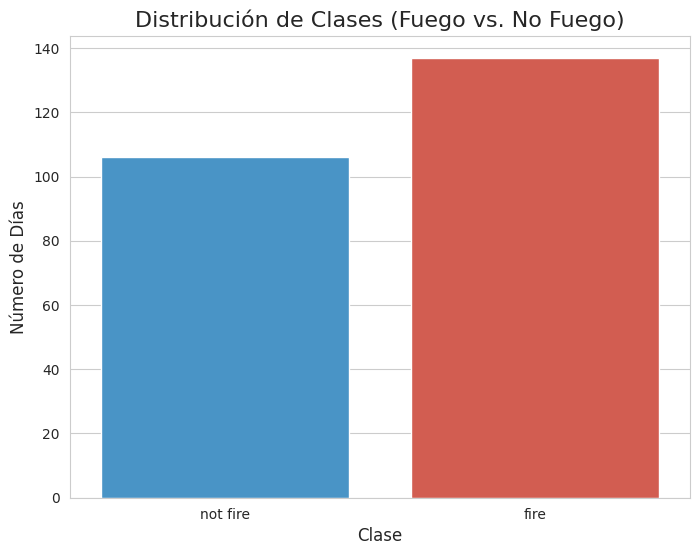

classes
fire        137
not fire    106
Name: count, dtype: int64


/tmp/ipython-input-36-549198711.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[0], x='classes', y='temperature', data=df, palette=['#3498db', '#e74c3c'], order=['not fire', 'fire'])
/tmp/ipython-input-36-549198711.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[1], x='classes', y='rh', data=df, palette=['#3498db', '#e74c3c'], order=['not fire', 'fire'])
/tmp/ipython-input-36-549198711.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[2], x='classes', y='ws', data=df, palette=['#3498db', '#e74c3c

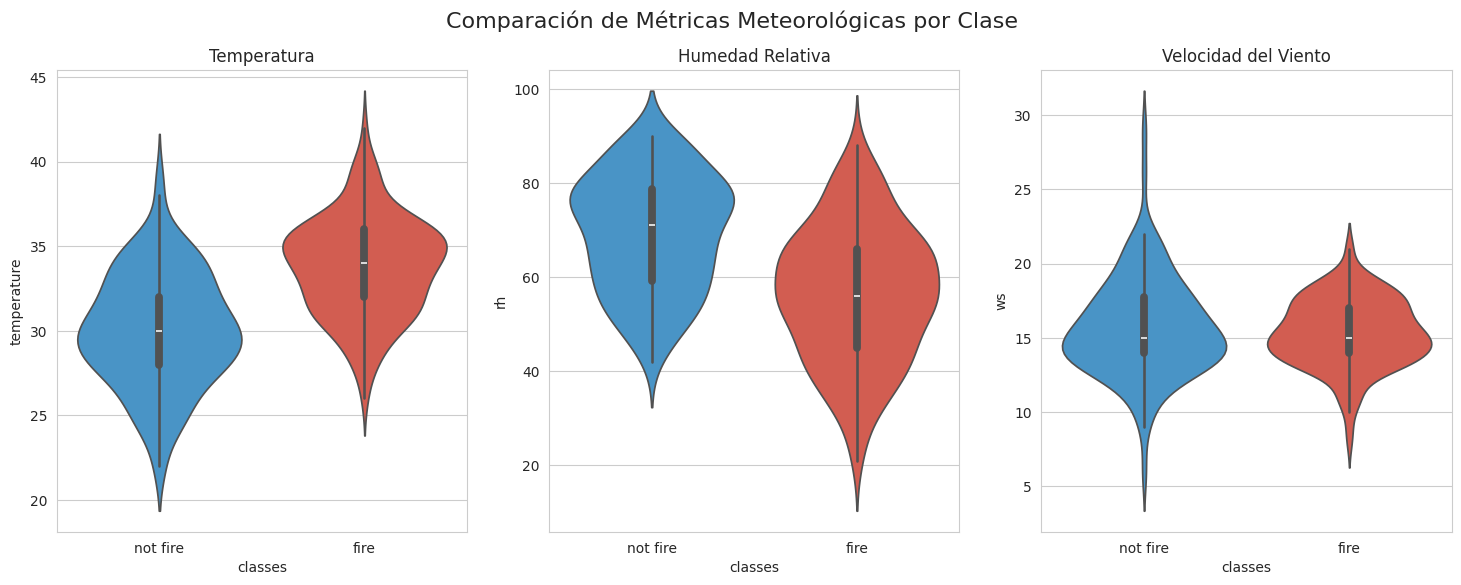

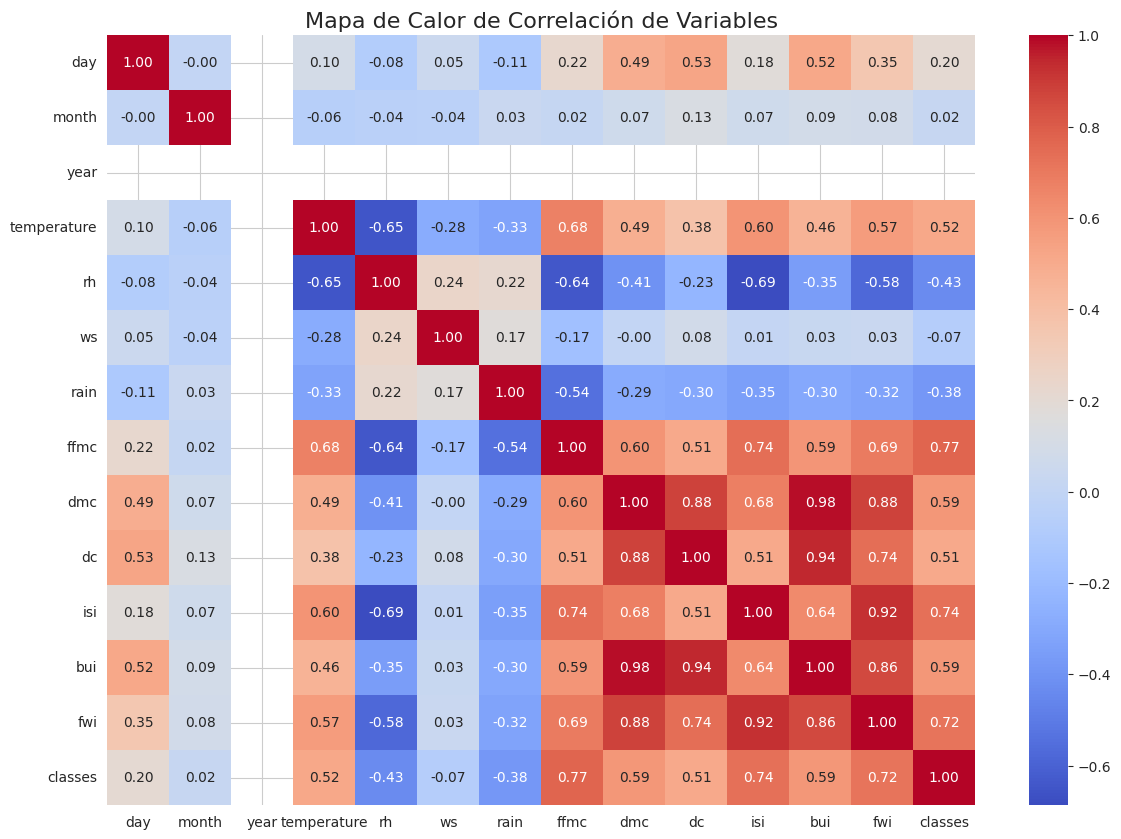

In [36]:
# PASO 1: IMPORTAR LIBRERÍAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Paso 1: Librerías importadas correctamente.")

# PASO 2: CARGAR Y LIMPIAR LOS DATOS
try:
    # Definimos los nombres de las columnas manualmente para evitar errores de lectura del encabezado
    column_names = ['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc', 'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes']

    # Usamos header=None y names=colum_names para tomar control total de la carga
    df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=None, names=column_names, skiprows=1)

    # Eliminamos la fila de encabezado que se repite en medio del archivo
    df.drop(df[df['day'] == 'day'].index, inplace=True)
    df.reset_index(drop=True, inplace=True)

    # Creamos la columna 'region'
    df.loc[:121, 'region'] = 'Bejaia'
    df.loc[122:, 'region'] = 'Sidi Bel-Abbes'

    # Limpiamos espacios en blanco de las columnas de texto
    for col in ['classes', 'region']:
        df[col] = df[col].str.strip()

    # Convertimos las columnas a tipos de datos numéricos
    numeric_cols = ['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc', 'dmc', 'dc', 'isi', 'bui', 'fwi']
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Eliminamos filas con valores nulos que pudieran aparecer durante la conversión
    df.dropna(inplace=True)

    # Aseguramos que las columnas de enteros sean del tipo correcto
    int_cols = ['day', 'month', 'year', 'temperature', 'rh', 'ws']
    df[int_cols] = df[int_cols].astype(int)

    print("Paso 2: Datos cargados y limpiados exitosamente.")
    print("DataFrame listo para visualizar. Columnas:", df.columns)

# PASO 3: ANÁLISIS VISUAL DE LOS DATOS
    print("\nPaso 3: Iniciando análisis visual...")

    # a) Distribución de la Variable Objetivo ('classes')
    plt.figure(figsize=(8, 6))
    sns.countplot(x='classes', data=df, palette=['#3498db', '#e74c3c'], order=['not fire', 'fire'])
    plt.title('Distribución de Clases (Fuego vs. No Fuego)', fontsize=16)
    plt.xlabel('Clase', fontsize=12)
    plt.ylabel('Número de Días', fontsize=12)
    plt.show()
    print(df['classes'].value_counts())

    # b) Análisis de Variables Meteorológicas por Clase
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Comparación de Métricas Meteorológicas por Clase', fontsize=16)
    sns.violinplot(ax=axes[0], x='classes', y='temperature', data=df, palette=['#3498db', '#e74c3c'], order=['not fire', 'fire'])
    axes[0].set_title('Temperatura')
    sns.violinplot(ax=axes[1], x='classes', y='rh', data=df, palette=['#3498db', '#e74c3c'], order=['not fire', 'fire'])
    axes[1].set_title('Humedad Relativa')
    sns.violinplot(ax=axes[2], x='classes', y='ws', data=df, palette=['#3498db', '#e74c3c'], order=['not fire', 'fire'])
    axes[2].set_title('Velocidad del Viento')
    plt.show()

    # c) Mapa de Calor de Correlación
    df_corr = df.copy()
    df_corr['classes'] = df_corr['classes'].apply(lambda x: 1 if x == 'fire' else 0)
    correlation_matrix = df_corr.drop('region', axis=1).corr()
    plt.figure(figsize=(14, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
    plt.title('Mapa de Calor de Correlación de Variables', fontsize=16)
    plt.show()

except FileNotFoundError:
    print("ERROR CRÍTICO: No se pudo encontrar el archivo 'Algerian_forest_fires_dataset_UPDATE.csv'.")
    print("Asegúrate de que el archivo esté en la misma carpeta que tu notebook.")
except Exception as e:
    print(f"Ha ocurrido un error inesperado: {e}")

**Modelado de datos**

--- FASE FINAL: PREPARACIÓN DE DATOS Y MODELADO ---

Variables predictoras (X): ['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc', 'dmc', 'dc', 'isi', 'bui', 'fwi']
Variable objetivo (y): 'classes'

Datos divididos: 194 para entrenamiento, 49 para prueba.
Datos escalados correctamente.

--- INICIANDO ENTRENAMIENTO Y EVALUACIÓN ---

--- Modelo 1: Regresión Logística ---
Resultados de la Regresión Logística:
Accuracy: 0.9388
              precision    recall  f1-score   support

    not fire       0.95      0.90      0.93        21
        fire       0.93      0.96      0.95        28

    accuracy                           0.94        49
   macro avg       0.94      0.93      0.94        49
weighted avg       0.94      0.94      0.94        49



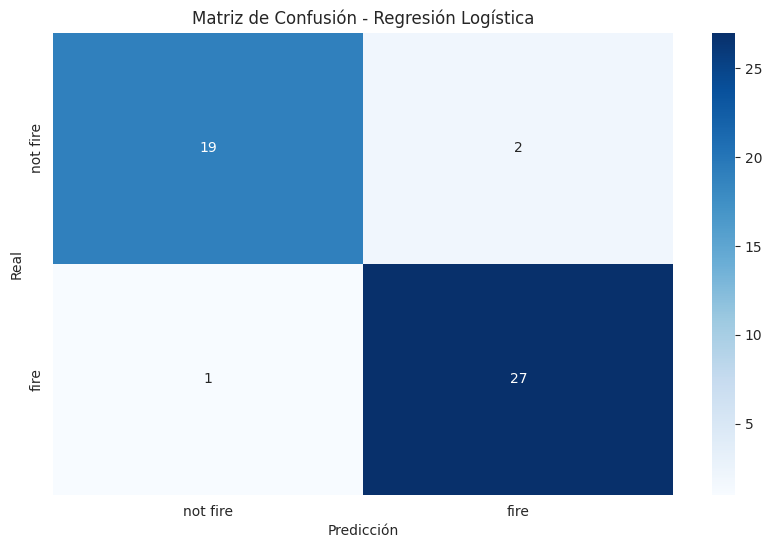


--- Modelo 2: XGBoost ---
Resultados de XGBoost:
Accuracy: 0.9592
              precision    recall  f1-score   support

    not fire       1.00      0.90      0.95        21
        fire       0.93      1.00      0.97        28

    accuracy                           0.96        49
   macro avg       0.97      0.95      0.96        49
weighted avg       0.96      0.96      0.96        49



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:41:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


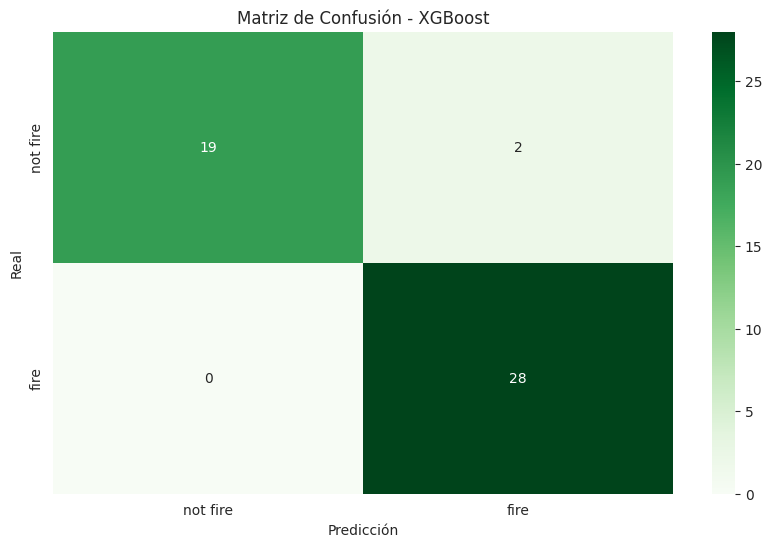

In [43]:
# Importamos las herramientas necesarias de Scikit-learn y XGBoost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

print("--- FASE FINAL: PREPARACIÓN DE DATOS Y MODELADO ---")

# 1. PREPARACIÓN DE DATOS PARA EL MODELADO

# a) Convertir las variables categóricas a números
# Usaremos pd.get_dummies para convertir 'region' y 'classes' en columnas numéricas
df_model = df.copy()
df_model['classes'] = df_model['classes'].apply(lambda x: 1 if x == 'fire' else 0)
# No necesitamos la columna 'region' para la predicción, así que la eliminamos
df_model = df_model.drop('region', axis=1)

# b) Separar características (X) y variable objetivo (y)
X = df_model.drop('classes', axis=1)
y = df_model['classes']

print("\nVariables predictoras (X):", X.columns.tolist())
print("Variable objetivo (y): 'classes'")

# 2. DIVISIÓN EN CONJUNTOS DE ENTRENAMIENTO Y PRUEBA
# Dividimos los datos: 80% para entrenar, 20% para probar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nDatos divididos: {len(X_train)} para entrenamiento, {len(X_test)} para prueba.")

# 3. ESCALADO DE CARACTERÍSTICAS
# Escalamos los datos para que las variables con rangos más grandes no dominen el modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Datos escalados correctamente.")


# 4. ENTRENAMIENTO Y EVALUACIÓN DE MODELOS
print("\n--- INICIANDO ENTRENAMIENTO Y EVALUACIÓN ---")

# a) Modelo 1: Regresión Logística (nuestro modelo base)
print("\n--- Modelo 1: Regresión Logística ---")
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

print("Resultados de la Regresión Logística:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(classification_report(y_test, y_pred_lr, target_names=['not fire', 'fire']))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', xticklabels=['not fire', 'fire'], yticklabels=['not fire', 'fire'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

# b) Modelo 2: XGBoost (nuestro modelo avanzado)
print("\n--- Modelo 2: XGBoost ---")
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

print("Resultados de XGBoost:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(classification_report(y_test, y_pred_xgb, target_names=['not fire', 'fire']))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens', xticklabels=['not fire', 'fire'], yticklabels=['not fire', 'fire'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - XGBoost')
plt.show()
